<font color=red>注：此处是文档第145页</font>

# 生成对抗示例
本教程将提高您对ML（机器学习）模型的安全漏洞的认识，并将深入了解对抗性机器学习的热门话题。您可能会惊讶地发现， 为图像添加难以察觉的扰动会导致模型性能大不相同。鉴于这是一个教程，我们将通过图像分类器上的示例探讨该主题。具体来说，我们将 使用第一种也是最流行的攻击方法之一，即快速梯度符号攻击算法（**FGSM**）来迷惑 **MNIST** 分类器。

## 1.威胁模型
对于上下文，有许多类别的对抗性攻击，每种攻击具有不同的目标和对攻击者知识的假设。然而，通常，总体目标是向输入数据添加最少 量的扰动以引起期望的错误分类。对攻击者的知识有几种假设，其中两种是：白盒子和黑盒子。白盒攻击假定攻击者具有对模型的全部 知识和访问权限，包括体系结构、输入、输出和权重。黑盒攻击假设攻击者只能访问模型的输入和输出，并且对底层架构或权重一无所知。 还有几种类型的目标，包括错误分类和源/目标错误分类。错误分类的目标意味着攻击者只希望输出分类错误，但不关心新分类是什么。 源/目标错误分类意味着攻击者想要更改最初属于特定源类的图像，以便将其归类为特定目标类。

**FGSM** 攻击是一种白盒攻击，其目标是错误分类。有了这些背景信息，我们现在可以详细讨论攻击。

## 2.FGSM（Fast Gradient Sign Attack）
**快速梯度标志攻击（FGSM）**：是迄今为止最早和最受欢迎的对抗性攻击之一，它由 Goodfellow 等人在[Explaining and Harnessing Adversarial Examples](https://arxiv.org/abs/1412.6572)中提出，是一种简单但是有效的对抗样本生成算法。它旨在通过利用模型学习的方式和渐变来攻击神经网络。这个想法很简单，攻击调整输入数据以基于相同的反向传播梯度来最大化损失，而不是通过基于反向传播的梯度调整权重来最小化损失。 换句话说，攻击是利用损失函数的梯度，然后调整输入数据以最大化损失。

在进入代码之前，先讲一下著名的 FGSM 熊猫示例并提取一些符号。
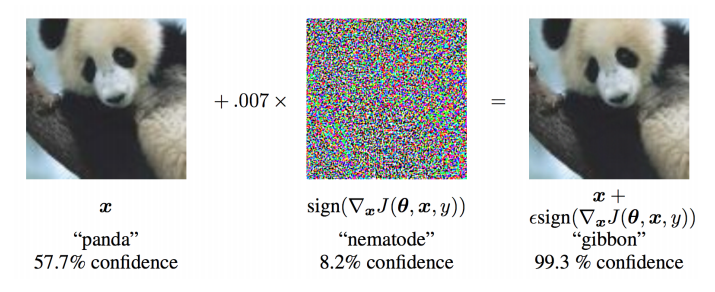

从图中可以看出， $x$是正确分类为“熊猫”的原始输入图像， $y$是$x$的基本事实标签， $\theta$代表模型参数， $J(\theta,x,y)$是用于训练网络的损失。攻击是反向将梯度传播回输入数据以计算$\nabla_xJ(\theta,x,y)$。然后，它在一个方向上（即$sign(\nabla_xJ(\theta,x,y))$）调整输入数据（图中的$\epsilon$或0.007），这将使损失最大化。然后，当目标网络仍然明显是“熊猫”时，由此产生的扰动图像被错误地分类为“长臂猿”。